In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) y
Token is valid (permission: write)

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
#!pip uninstall keras tensorflow
#!pip install tensorflow==2.12.0 keras==2.12.0

In [ ]:
#https://www.youtube.com/watch?v=s95A-au3vsM
import tensorflow as tf
from huggingface_hub import push_to_hub_keras

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(2, activation="relu"))
model.compile(optimizer="adam", loss="mse")

# Your model must be built in order to push it!
model.build((None, 2))

push_to_hub_keras(model, 'Toxic-Comment-Classification')

Upload 3 LFS files:   0%|          | 0/3 [00:00<?, ?it/s]

fingerprint.pb:   0%|          | 0.00/56.0 [00:00<?, ?B/s]

saved_model.pb:   0%|          | 0.00/40.4k [00:00<?, ?B/s]

keras_metadata.pb:   0%|          | 0.00/3.52k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/Johnesss/Toxic-Comment-Classification/commit/a8f3abf298a61eba2c7fd09f96f4cbacd2bf1136', commit_message='Push Keras model using huggingface_hub.', commit_description='', oid='a8f3abf298a61eba2c7fd09f96f4cbacd2bf1136', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D
from sklearn.model_selection import train_test_split

In [ ]:
train_df = pd.read_csv('/content/train.csv', on_bad_lines='skip').fillna(' ')
test_df = pd.read_csv('/content/test.csv', on_bad_lines='skip').fillna(' ')

In [ ]:
x=train_df['comment_text'].values
x

array(["Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",
       "D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)",
       "Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",
       ...,
       'Spitzer \n\nUmm, theres no actual article for prostitution ring.  - Crunch Captain.',
       'And it looks like it was actually you who put on the speedy to have the first version deleted now that I look at it.',
       '"\nAnd ... I really don\'t think you understand.  I came here and my idea was bad right away.  What kind of communit

In [ ]:
#Search toxic comments
train_df.loc[train_df['toxic']==1]

id                                       comment_text  \
6       0002bcb3da6cb337       COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK   
12      0005c987bdfc9d4b  Hey... what is it..\n@ | talk .\nWhat is it......   
16      0007e25b2121310b  Bye! \n\nDon't look, come or think of comming ...   
42      001810bf8c45bf5f  You are gay or antisemmitian? \n\nArchangel WH...   
43      00190820581d90ce           FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!   
...                  ...                                                ...   
159494  fef4cf7ba0012866  "\n\n our previous conversation \n\nyou fuckin...   
159514  ff39a2895fc3b40e                  YOU ARE A MISCHIEVIOUS PUBIC HAIR   
159541  ffa33d3122b599d6  Your absurd edits \n\nYour absurd edits on gre...   
159546  ffb47123b2d82762  "\n\nHey listen don't you ever!!!! Delete my e...   
159554  ffbdbb0483ed0841  and i'm going to keep posting the stuff u dele...   

        toxic  severe_toxic  obscene  threat  insult  identity_hate  
6           1             1        1       0       1              0  
12          1             0        0       0       0              0  
16          1             0        0       0       0              0  
42          1             0        1       0       1              1  
43          1             0        1       0       1              0  
...       ...           ...      ...     ...     ...            ...  
159494      1             0        1       0       1              1  
159514      1             0        0       0       1              0  
159541      1             0        1       0       1              0  
159546      1             0        0       0       1              0  
159554      1             0        1       0       1              0  

[15294 rows x 8 columns]

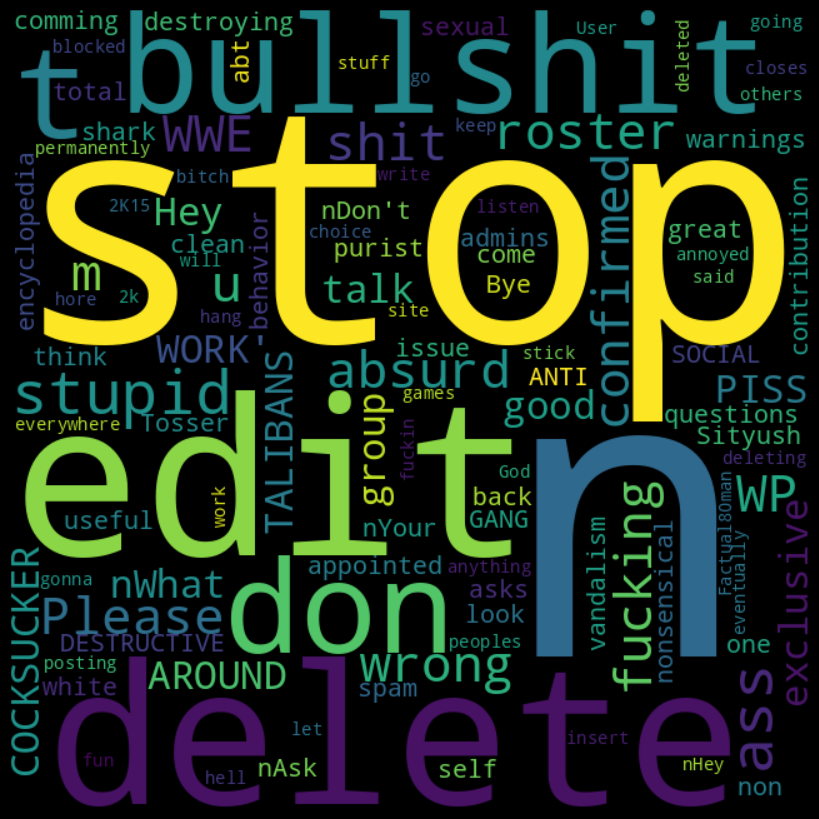

In [ ]:
#Toxic diagram
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
comments = train_df['comment_text'].loc[train_df['toxic']==1].values
wordcloud = WordCloud(
    width = 640,
    height = 640,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(comments))
fig = plt.figure(
    figsize = (12, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

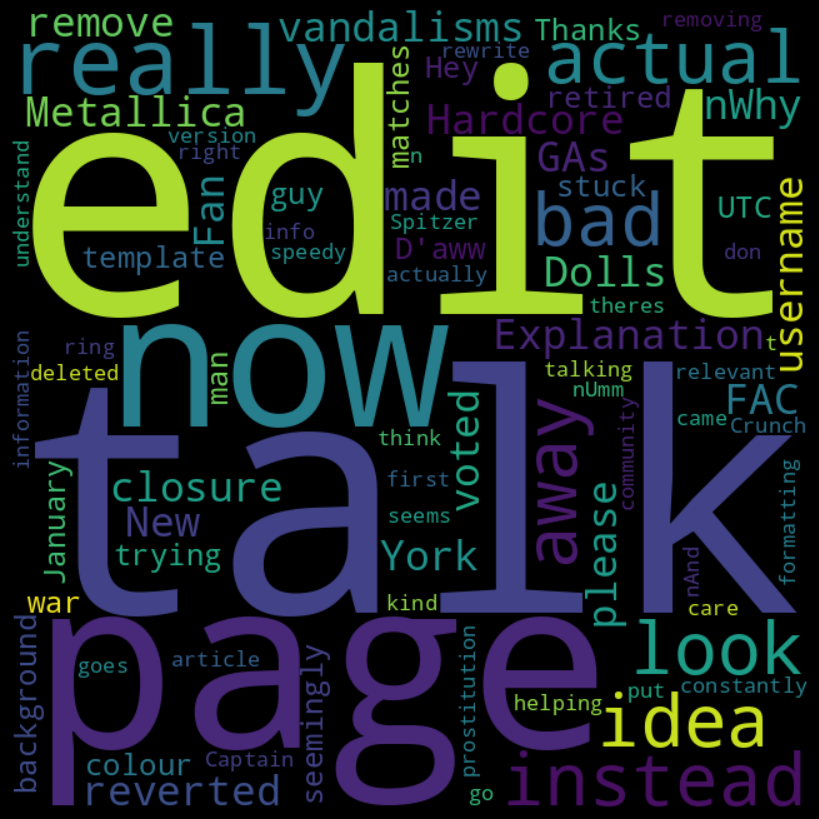

In [ ]:
#Non toxic diagram
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
comments = train_df['comment_text'].loc[train_df['toxic']==0].values
wordcloud = WordCloud(
    width = 640,
    height = 640,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(comments))
fig = plt.figure(
    figsize = (12, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
y=train_df['toxic'].values
y

array([0, 0, 0, ..., 0, 0, 0])

Text(0.5, 1.0, 'Distribution of Toxic Comments')

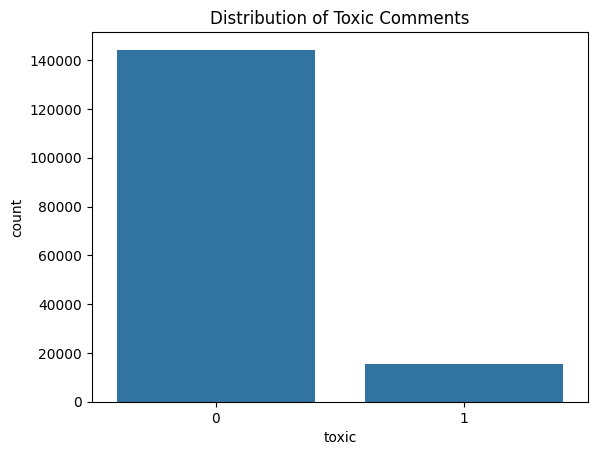

In [ ]:
# Plot frequency of toxic comments

sns.countplot(x='toxic',data=train_df)
plt.title('Distribution of Toxic Comments')

In [ ]:
train_df['toxic'].value_counts()

toxic
0    144277
1     15294
Name: count, dtype: int64

In [ ]:
#Data Prep — Tokenize and Pad Text Data¶
max_features=20000
max_text_length=400

x_tokenizer=text.Tokenizer(max_features)
x_tokenizer.fit_on_texts(list(x))
x_tokenized=x_tokenizer.texts_to_sequences(x)
x_train_val=sequence.pad_sequences(x_tokenized,maxlen=max_text_length)
x_train_val

array([[    0,     0,     0, ...,  4583,  2273,   985],
       [    0,     0,     0, ...,   589,  8377,   182],
       [    0,     0,     0, ...,     1,   737,   468],
       ...,
       [    0,     0,     0, ...,  3509, 13675,  4528],
       [    0,     0,     0, ...,   151,    34,    11],
       [    0,     0,     0, ...,  1627,  2056,    88]], dtype=int32)

In [ ]:
#Embedding Matrix with Pre-trained GloVe Embeddings
#!wget http://nlp.stanford.edu/data/glove.6B.zip
#!unzip -q ./glove.6B.zip.1
embedding_dim=100
embedding_index=dict()
f=open('/content/glove.6B.100d.txt')
for line in f:
    values=line.split()
    word=values[0]
    coefs=np.asarray(values[1:],dtype='float32')
    embedding_index[word]=coefs

f.close()
print(f'Found {len(embedding_index)} word vectors')

Found 400000 word vectors


In [ ]:
#Create embedding layer
embedding_matrix=np.zeros((max_features,embedding_dim))
for word,index in x_tokenizer.word_index.items():
    if index>max_features-1:
        break
    else:
        embedding_vector=embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[index]=embedding_vector

model=Sequential()
model.add(Embedding(max_features,
                   embedding_dim,
                   embeddings_initializer=tf.keras.initializers.Constant(
                   embedding_matrix),
                   trainable=False))
model.add(Dropout(0.2))

In [ ]:
#Classification model CNN
filters=250
kernel_size=3
hidden_dims=250

model.add(Conv1D(filters,
                kernel_size,
                padding='valid'))
model.add(MaxPooling1D())
model.add(Conv1D(filters,
                5,
                padding='valid',
                activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_dims,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         2000000   
                                                                 
 dropout (Dropout)           (None, None, 100)         0         
                                                                 
 conv1d (Conv1D)             (None, None, 250)         75250     
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 250)        0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, None, 250)         312750    
                                                                 
 global_max_pooling1d (Globa  (None, 250)              0         
 lMaxPooling1D)                                       

In [ ]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
x_train,x_val,y_train,y_val=train_test_split(x_train_val,y,test_size=0.2,random_state=1)
batch_size=32
epochs=3
model.fit(x_train,y_train,
         batch_size=batch_size,
         epochs=epochs,
         validation_data=(x_val,y_val))

Epoch 1/3
3990/3990 [==============================] - 2243s 561ms/step - loss: 0.1540 - accuracy: 0.9444 - val_loss: 0.1266 - val_accuracy: 0.9527
Epoch 2/3
3990/3990 [==============================] - 2211s 554ms/step - loss: 0.1339 - accuracy: 0.9506 - val_loss: 0.1193 - val_accuracy: 0.9548
Epoch 3/3
3990/3990 [==============================] - 2136s 535ms/step - loss: 0.1234 - accuracy: 0.9544 - val_loss: 0.1203 - val_accuracy: 0.9560


In [ ]:
test_df=pd.read_csv('/content/test.csv')
test_df

id                                       comment_text
0       00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1       0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2       00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3       00017563c3f7919a  :If you have a look back at the source, the in...
4       00017695ad8997eb          I don't anonymously edit articles at all.
...                  ...                                                ...
153159  fffcd0960ee309b5  . \n i totally agree, this stuff is nothing bu...
153160  fffd7a9a6eb32c16  == Throw from out field to home plate. == \n\n...
153161  fffda9e8d6fafa9e  " \n\n == Okinotorishima categories == \n\n I ...
153162  fffe8f1340a79fc2  " \n\n == ""One of the founding nations of the...
153163  ffffce3fb183ee80  " \n :::Stop already. Your bullshit is not wel...

[153164 rows x 2 columns]

In [ ]:
x_test=test_df['comment_text'].values
x_test_tokenized=x_tokenizer.texts_to_sequences(x_test)
x_testing=sequence.pad_sequences(x_test_tokenized,maxlen=max_text_length)

In [ ]:
y_testing=model.predict(x_testing,verbose=1,batch_size=32)

4787/4787 [==============================] - 698s 146ms/step


In [ ]:
y_testing.shape
y_testing[0]

array([0.99877465], dtype=float32)

In [ ]:
test_df['Toxic']=['Not Toxic' if x<0.5 else 'Toxic' for x in y_testing]
test_df[['comment_text','Toxic']].head(20)

comment_text      Toxic
0   Yo bitch Ja Rule is more succesful then you'll...      Toxic
1   == From RfC == \n\n The title is fine as it is...  Not Toxic
2   " \n\n == Sources == \n\n * Zawe Ashton on Lap...  Not Toxic
3   :If you have a look back at the source, the in...  Not Toxic
4           I don't anonymously edit articles at all.  Not Toxic
5   Thank you for understanding. I think very high...  Not Toxic
6   Please do not add nonsense to Wikipedia. Such ...  Not Toxic
7                    :Dear god this site is horrible.  Not Toxic
8   " \n Only a fool can believe in such numbers. ...      Toxic
9   == Double Redirects == \n\n When fixing double...  Not Toxic
10  I think its crap that the link to roggenbier i...      Toxic
11  "::: Somebody will invariably try to add Relig...  Not Toxic
12  , 25 February 2010 (UTC) \n\n :::Looking it ov...  Not Toxic
13  " \n\n It says it right there that it IS a typ...  Not Toxic
14  " \n\n == Before adding a new product to the l...  Not Toxic
15  ==Current Position== \n Anyone have confirmati...  Not Toxic
16                           this other one from 1897  Not Toxic
17  == Reason for banning throwing == \n\n This ar...  Not Toxic
18  :: Wallamoose was changing the cited material ...  Not Toxic
19             |blocked]] from editing Wikipedia.   |  Not Toxic

In [ ]:
from huggingface_hub import push_to_hub_keras

push_to_hub_keras(model, 'Toxic-Comment-Classification')

fingerprint.pb:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

keras_metadata.pb:   0%|          | 0.00/119M [00:00<?, ?B/s]

Upload 4 LFS files:   0%|          | 0/4 [00:00<?, ?it/s]

saved_model.pb:   0%|          | 0.00/158k [00:00<?, ?B/s]

variables.data-00000-of-00001:   0%|          | 0.00/9.81M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/Johnesss/Toxic-Comment-Classification/commit/2bade52854c41bf2f583c0a18617fa08fa53367e', commit_message='Push Keras model using huggingface_hub.', commit_description='', oid='2bade52854c41bf2f583c0a18617fa08fa53367e', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
from huggingface_hub import from_pretrained_keras

reloaded_model = from_pretrained_keras('Johnesss/Toxic-Comment-Classification')

Fetching 8 files:   0%|          | 0/8 [00:00<?, ?it/s]

README.md:   0%|          | 0.00/841 [00:00<?, ?B/s]

.gitattributes:   0%|          | 0.00/1.59k [00:00<?, ?B/s]

variables/variables.index:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.png:   0%|          | 0.00/26.4k [00:00<?, ?B/s]

fingerprint.pb:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

variables.data-00000-of-00001:   0%|          | 0.00/9.81M [00:00<?, ?B/s]

saved_model.pb:   0%|          | 0.00/158k [00:00<?, ?B/s]

keras_metadata.pb:   0%|          | 0.00/119M [00:00<?, ?B/s]

In [ ]:
y_testing=reloaded_model.predict(x_testing,verbose=1,batch_size=32)
test_df['Toxic']=['Not Toxic' if x<0.5 else 'Toxic' for x in y_testing]
test_df[['comment_text','Toxic']].head(20)

4787/4787 [==============================] - 700s 146ms/step


comment_text      Toxic
0   Yo bitch Ja Rule is more succesful then you'll...      Toxic
1   == From RfC == \n\n The title is fine as it is...  Not Toxic
2   " \n\n == Sources == \n\n * Zawe Ashton on Lap...  Not Toxic
3   :If you have a look back at the source, the in...  Not Toxic
4           I don't anonymously edit articles at all.  Not Toxic
5   Thank you for understanding. I think very high...  Not Toxic
6   Please do not add nonsense to Wikipedia. Such ...  Not Toxic
7                    :Dear god this site is horrible.  Not Toxic
8   " \n Only a fool can believe in such numbers. ...      Toxic
9   == Double Redirects == \n\n When fixing double...  Not Toxic
10  I think its crap that the link to roggenbier i...      Toxic
11  "::: Somebody will invariably try to add Relig...  Not Toxic
12  , 25 February 2010 (UTC) \n\n :::Looking it ov...  Not Toxic
13  " \n\n It says it right there that it IS a typ...  Not Toxic
14  " \n\n == Before adding a new product to the l...  Not Toxic
15  ==Current Position== \n Anyone have confirmati...  Not Toxic
16                           this other one from 1897  Not Toxic
17  == Reason for banning throwing == \n\n This ar...  Not Toxic
18  :: Wallamoose was changing the cited material ...  Not Toxic
19             |blocked]] from editing Wikipedia.   |  Not Toxic